In [1]:
#  Updated Example with Pruning Count
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
from tslearn.metrics import dtw, lb_keogh
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load dataset
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# 1-NN with LB_Keogh pruning and stats
class LBKeogh1NN:
    def __init__(self, lb_radius=5):
        self.lb_radius = lb_radius
        self.total_dtw_calls = 0
        self.total_pruned = 0

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        preds = []
        for x in tqdm(X_test, desc="Classifying"):
            min_dtw = float('inf')
            best_label = None
            for xt, label in zip(self.X_train, self.y_train):
                # Prune using LB_Keogh
                lb = lb_keogh(x, xt, radius=self.lb_radius)
                if lb >= min_dtw:
                    self.total_pruned += 1
                    continue

                dist = dtw(x, xt)
                self.total_dtw_calls += 1
                if dist < min_dtw:
                    min_dtw = dist
                    best_label = label
            preds.append(best_label)
        return np.array(preds)

# Run
model = LBKeogh1NN(lb_radius=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"DTW calls made: {model.total_dtw_calls}")
print(f"Candidates pruned by LB_Keogh: {model.total_pruned}")
total_candidates = len(X_test) * len(X_train)
print(f"Pruning ratio: {model.total_pruned / total_candidates:.2%}")


/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
Classifying: 100%|██████████| 150/150 [00:01<00:00, 99.97it/s] 

Accuracy: 0.9400
DTW calls made: 605
Candidates pruned by LB_Keogh: 6895
Pruning ratio: 91.93%


In [ ]:
# Import dataset
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
import matplotlib.pyplot as plt

# Load dataset (e.g., GunPoint)
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()


In [ ]:
X_train[49]

array([-1.4357199 , -1.4322717 , -1.4329285 , -1.4316413 , -1.4325953 ,
       -1.432303  , -1.4334516 , -1.4324265 , -1.4332729 , -1.429953  ,
       -1.4296726 , -1.4291101 , -1.4292611 , -1.4266512 , -1.426664  ,
       -1.4237981 , -1.4258321 , -1.4261731 , -1.425976  , -1.4103294 ,
       -1.3346269 , -1.2088542 , -1.0003547 , -0.75365711, -0.46416938,
       -0.19393205,  0.00215441,  0.25182777,  0.40863902,  0.54002986,
        0.6245556 ,  0.68736082,  0.71154432,  0.73640378,  0.73681049,
        0.74538794,  0.74814274,  0.75259649,  0.77412086,  0.77489819,
        0.77176965,  0.78379451,  0.78556018,  0.78829486,  0.790786  ,
        0.78666364,  0.78842596,  0.78669538,  0.78859965,  0.7945724 ,
        0.78568312,  0.78784802,  0.79121161,  0.78588989,  0.78513379,
        0.79321914,  0.79275118,  0.78998297,  0.79244662,  0.79109079,
        0.79155998,  0.79274213,  0.79131007,  0.79359836,  0.79334957,
        0.7844746 ,  0.78340836,  0.78523584,  0.79023545,  0.78

Best match index: 13, Label: 1
Distance: 0.5697


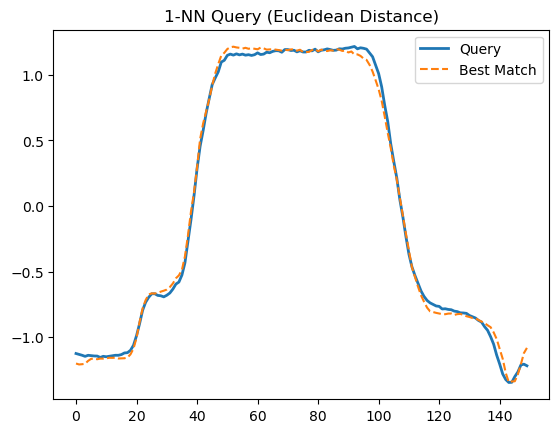

In [ ]:

# Squeeze to 2D (n_samples, time_length)
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# Use first test series as query
query_ts = X_test[0]

# Compute Euclidean distances to all training samples
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

distances = np.array([euclidean_distance(query_ts, x) for x in X_train])

# Find best match
best_idx = np.argmin(distances)
best_match = X_train[best_idx]

print(f"Best match index: {best_idx}, Label: {y_train[best_idx]}")
print(f"Distance: {distances[best_idx]:.4f}")

# Plot
plt.plot(query_ts, label="Query", linewidth=2)
plt.plot(best_match, label="Best Match", linestyle="--")
plt.legend()
plt.title("1-NN Query (Euclidean Distance)")
plt.show()
